# 多次元信号処理特論　第４章　演習課題

## 課題1

以下に与えられている$y_\alpha$を$a_1 x_\alpha -a_2$で近似するとき，最小２乗法によって最適な$a_1$と$a_2$を求めよ．

なお，連立方程式$y=Ax$の解は

```
np.linalg.solve(A,x)
```
によって行える．

ヒント：解説で述べた行列$A$までは作っておいた．


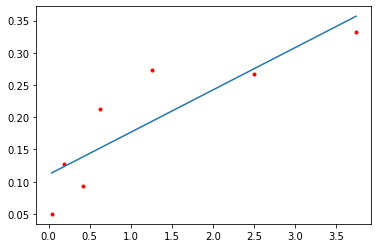

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0.038, 0.194, 0.425, 0.626, 1.253, 2.500, 3.740])
y = np.array([0.050, 0.127, 0.094, 0.2122, 0.2729, 0.2665, 0.3317])

#行列Aを作る
A=np.ones([7,2])
A[:,0]=x

#適当な直線のパラメータ（まったくダメなやつ）
a =[0.001, 0.2]

#このあと連立方程式を解いて最適な$a$を決める
X = np.dot( np.linalg.inv(np.dot(A.T, A)) , np.dot(A.T, y) )

#グラフ
plt.plot(x,y,'r.')
plt.plot(x,X[0]*x + X[1])


## 課題２

以下に与えられている$[x_\alpha]_2$を

$\frac{u_1 [x_\alpha]_1}{u_2+[x_\alpha]_1}$

という関数で近似するとき，以下の目的関数

$ \frac{1}{2}\sum_\alpha \left([x_\alpha]_2 - \frac{u_1 [x_\alpha]_1}{u_2+[x_\alpha]_1}\right)^2$

を最小化するパラメータ$u_1, u_2$を，Gauss-Newton法を実装して求めよ．

ヒントとして，固定ステップサイズの勾配降下法のコードを載せておくので参考にせよ．

※この問題の数値と関数の例は[Wikipedia](https://ja.wikipedia.org/wiki/%E3%82%AC%E3%82%A6%E3%82%B9%E3%83%BB%E3%83%8B%E3%83%A5%E3%83%BC%E3%83%88%E3%83%B3%E6%B3%95)より引用した．

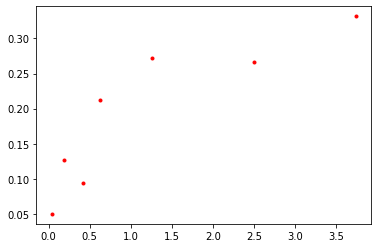

In [ ]:
x1 = np.array([0.038, 0.194, 0.425, 0.626, 1.253, 2.500, 3.740])
x2 = np.array([0.050, 0.127, 0.094, 0.2122, 0.2729, 0.2665, 0.3317])

# 数値例はWikipediaによる

plt.plot(x1,x2,'r.')

In [ ]:
# 各種関数の定義

#近似関数
def f(x1,u):
  return u[0]*x1/(u[1]+x1)

# ∇uF
def calc_nuF(x1,u):
  nuF = np.zeros([7,2])
  nuF[:,0] = -x1/(u[1]+x1)
  nuF[:,1] = u[0]*x1/((u[1]+x1)**2)
  return nuF

# F
def calc_F(x1,x2,u):
  return x2-f(x1,u)



In [ ]:
#勾配降下法

u = np.array([0.9, 0.2])
step = 1e-1

for i in range(20):
  nuF = calc_nuF(x1,u)
  F = calc_F(x1,x2,u)
  # 勾配
  nabla_u = np.matmul(F, nuF)
  # 勾配降下
  u = u - step*nabla_u
  print(u)

[0.66661402 0.38644544]
[0.56789505 0.42693775]
[0.50356526 0.44825822]
[0.45944241 0.46095297]
[0.42846583 0.4690345 ]
[0.40643995 0.4744141 ]
[0.39065898 0.47811596]
[0.37929857 0.48073215]
[0.37109594 0.48262416]
[0.36516256 0.48402199]
[0.36086647 0.48507674]
[0.35775506 0.48589021]
[0.3555025  0.48653233]
[0.35387346 0.48705182]
[0.35269756 0.48748305]
[0.35185121 0.48785046]
[0.35124465 0.48817154]
[0.35081265 0.48845884]
[0.35050776 0.48872146]
[0.35029542 0.48896595]


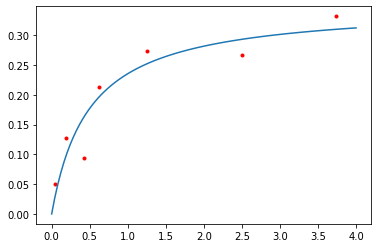

In [ ]:
#グラフも書いてみよう
xx = (np.linspace(0, 4, 100))
plt.plot(x1,x2,'r.')
plt.plot(xx, f(xx,u))


## 課題３（追加課題）


*   課題１のコードを多項式による近似へと拡張せよ
*   課題２で$u$の初期値が大きいとき（例：$u=[3,3]$，ガウスニュートン法がどのような挙動を示すか調べて報告せよ




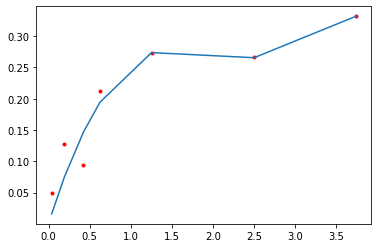

In [64]:
x = np.array([0.038, 0.194, 0.425, 0.626, 1.253, 2.500, 3.740])
y = np.array([0.050, 0.127, 0.094, 0.2122, 0.2729, 0.2665, 0.3317])


#行列Aを作る
def fitting(deg):
    A=np.ones([7,deg])
    for i in range(deg):
        A[:,i-1] = x**(i)
        
#次数指定
fitting(1)


#このあと連立方程式を解いて最適な$a$を決める
X = np.dot( np.linalg.inv(np.dot(A.T, A)) , np.dot(A.T, y) )

Y_ans = 0
for i in range(X.size):
    Y = X[i] * x**(i+1)
    Y_ans += Y
    
#グラフ
plt.plot(x,y,'r.')
plt.plot(x , Y_ans)


In [37]:
def fitting(deg):
    A=np.ones([7,deg])
    for i in range(deg):
        A[:,i]=x**(i+1)

In [71]:
A=np.ones([7,1])
A[:,0] = x**1

In [88]:
x = np.array([0.038, 0.194, 0.425, 0.626, 1.253, 2.500, 3.740])

def fitting(deg):
    A=np.ones([7,deg])
    for i in range(deg):
        A[:,i-1] = x**(i)
    return A

#次数指定
fitting(3)

array([[3.800000e-02, 1.444000e-03, 1.000000e+00],
       [1.940000e-01, 3.763600e-02, 1.000000e+00],
       [4.250000e-01, 1.806250e-01, 1.000000e+00],
       [6.260000e-01, 3.918760e-01, 1.000000e+00],
       [1.253000e+00, 1.570009e+00, 1.000000e+00],
       [2.500000e+00, 6.250000e+00, 1.000000e+00],
       [3.740000e+00, 1.398760e+01, 1.000000e+00]])

In [48]:
Y_arr

[array([0.01622463, 0.08283103, 0.18145972, 0.2672795 , 0.53498596,
        1.06741014, 1.59684556]),
 array([-2.95439580e-04, -7.70025210e-03, -3.69555222e-02, -8.01770643e-02,
        -3.21220775e-01, -1.27873779e+00, -2.86183564e+00]),
 array([1.67502145e-06, 2.22881886e-04, 2.34334576e-03, 7.48846119e-03,
        6.00513530e-02, 4.76968403e-01, 1.59692452e+00])]

In [18]:
x**2

array([1.444000e-03, 3.763600e-02, 1.806250e-01, 3.918760e-01,
       1.570009e+00, 6.250000e+00, 1.398760e+01])

In [25]:
A

array([[3.800000e-02, 1.444000e-03],
       [1.940000e-01, 3.763600e-02],
       [4.250000e-01, 1.806250e-01],
       [6.260000e-01, 3.918760e-01],
       [1.253000e+00, 1.570009e+00],
       [2.500000e+00, 6.250000e+00],
       [3.740000e+00, 1.398760e+01]])